In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

In [2]:
'''from google.colab import files
uploaded = files.upload()'''

df = pd.read_csv('Cleaned_Diabetes.csv') # replace with actual filename from upload

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

#### **Diabetes_binary's correlation with other columns**
- threshold = 0.1
- if |correlation| >= threshold we consider the feature is correlated with Diabetes_binary

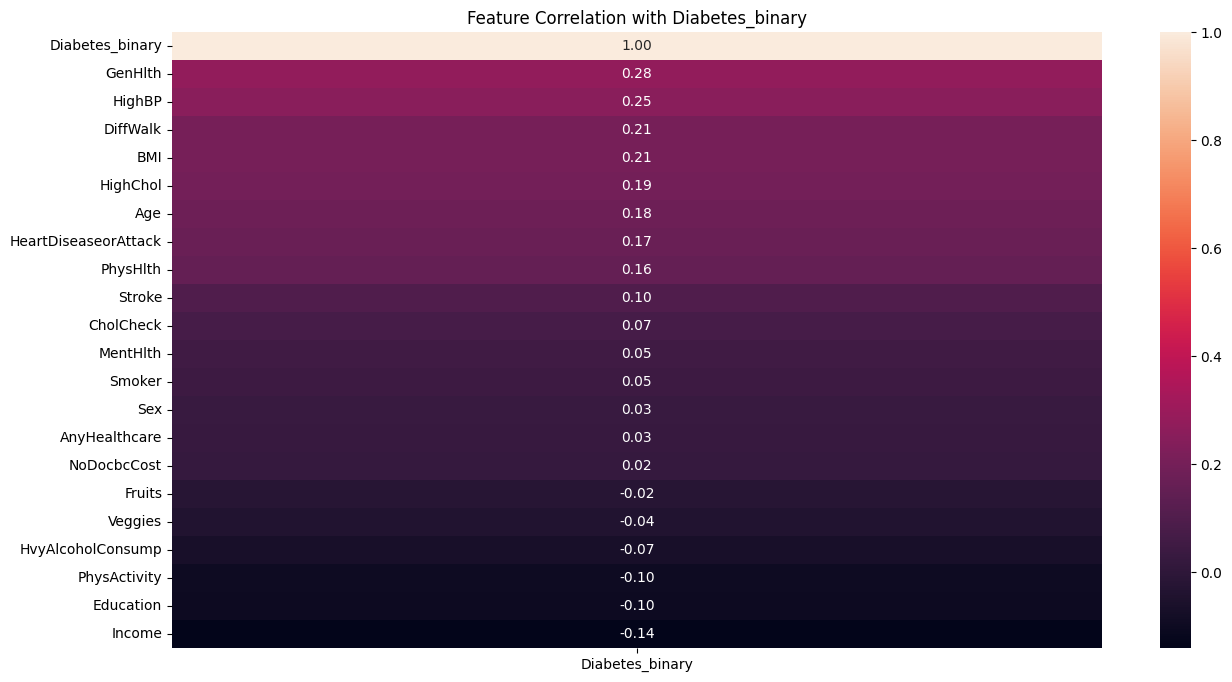

In [5]:
cor_matrix = df.corr()

#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cor_matrix[['Diabetes_binary']].sort_values(by='Diabetes_binary' , ascending= False) , annot=True, cmap='rocket' , fmt='.2f')
plt.title('Feature Correlation with Diabetes_binary')
plt.show()

- Postive correlated : `HighBP` , `HighChol` , `BMI` , `DiffWalk` , `GenHlth` , `Age` , `HeartDiseaseorAttack` , `PhysHlth` and `Stroke`
- Negative correlated : `PhysActivity` , `Education` and `income`

### Try to find best features with Chi-Squared and Anova-Test

In [6]:
from sklearn.feature_selection import SelectKBest , chi2 , f_classif
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Diabetes_binary' , axis=1)
y = df['Diabetes_binary']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Squared
chi2_selector = SelectKBest(chi2 , k='all')
X_chi2 = chi2_selector.fit_transform(X_scaled , y)
chi_scores = pd.Series(chi2_selector.scores_ , index=X.columns).sort_values(ascending=False)

# Apply Anova
anova_selector = SelectKBest(f_classif , k='all')
X_anova = anova_selector.fit_transform(X_scaled , y)
anova_scores = pd.Series(anova_selector.scores_ , index=X.columns).sort_values(ascending=False)

In [7]:
chi_scores

HighBP                  8098.548237
DiffWalk                7875.496177
HeartDiseaseorAttack    5822.145697
HighChol                4869.312739
PhysHlth                3266.292056
GenHlth                 3115.279621
Stroke                  2156.678382
HvyAlcoholConsump        937.401148
Age                      812.103743
PhysActivity             617.563886
Income                   581.129755
MentHlth                 380.652825
BMI                      309.992581
Smoker                   253.826098
Sex                      137.837135
Education                119.900184
NoDocbcCost               83.662830
Veggies                   82.098846
Fruits                    54.688897
CholCheck                 48.904140
AnyHealthcare              7.949731
dtype: float64

#### Best Features By Chi-Squared Test
1. HighBP
2. DiffWalk
3. HeartDiseaseorAttack
4. HighChol
5. PhysHlth
6. GenHlth
7. Stroke

In [8]:
anova_scores

GenHlth                 19061.436601
HighBP                  15868.017696
DiffWalk                10097.616798
BMI                     10075.425186
HighChol                 9065.177413
Age                      7444.458687
HeartDiseaseorAttack     6682.140008
PhysHlth                 5739.591424
Income                   4631.714144
Education                2445.440895
PhysActivity             2336.872150
Stroke                   2280.282576
CholCheck                1213.321927
HvyAlcoholConsump        1002.426607
MentHlth                  674.908702
Smoker                    476.133601
Veggies                   400.370333
Sex                       245.998296
AnyHealthcare             147.341358
Fruits                    141.282132
NoDocbcCost                92.269537
dtype: float64

#### Best Features By Anova Test
1. GenHlth
2. HighBP
3. DiffWalk
4. BMI
5. HighChol
6. Age
7. HeartDiseaseorAttack

## Top Features For the ML Models
- HighBP
- GenHlth
- DiffWalk
- BMI
- HighChol
- HeartDiseaseorAttack
- PhysHlth
- Age
- Stroke
- Income

In [9]:
# drop unused columns
top_features = ['HighBP', 'GenHlth', 'DiffWalk', 'BMI', 'HighChol', 'HeartDiseaseorAttack', 'PhysHlth', 'Age', 'Stroke', 'Income']
X_top = df[top_features]
y = df['Diabetes_binary']
X_top.head()

,HighBP,GenHlth,DiffWalk,BMI,HighChol,HeartDiseaseorAttack,PhysHlth,Age,Stroke,Income
0,1.0,5.0,1.0,40.0,1.0,0.0,15.0,9.0,0.0,3.0
1,0.0,3.0,0.0,25.0,0.0,0.0,0.0,7.0,0.0,1.0
2,1.0,5.0,1.0,28.0,1.0,0.0,30.0,9.0,0.0,8.0
3,1.0,2.0,0.0,27.0,0.0,0.0,0.0,11.0,0.0,6.0
4,1.0,2.0,0.0,24.0,1.0,0.0,0.0,11.0,0.0,4.0


## Deal with imbalance

In [10]:
y.value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

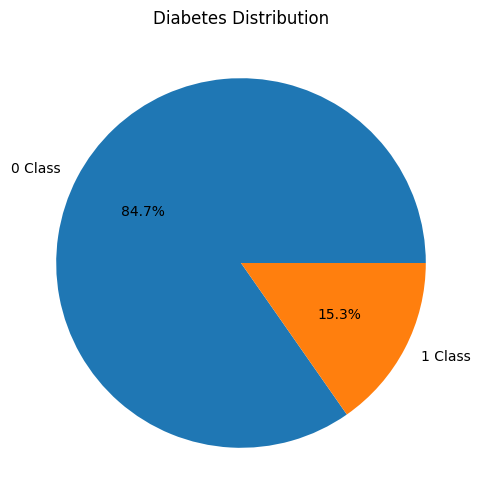

In [11]:
plt.figure(figsize=(8,6))
plt.pie(y.value_counts() , labels=['0 Class' , '1 Class'] , autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42 , stratify= y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183579, 10), (45895, 10), (183579,), (45895,))

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_top, y)

In [15]:
X_resampled.shape, y_resampled.shape

((388754, 10), (388754,))

In [16]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42 , stratify= y_resampled)
X_train_resampled.shape, X_test_resampled.shape, y_train_resampled.shape, y_test_resampled.shape

((311003, 10), (77751, 10), (311003,), (77751,))

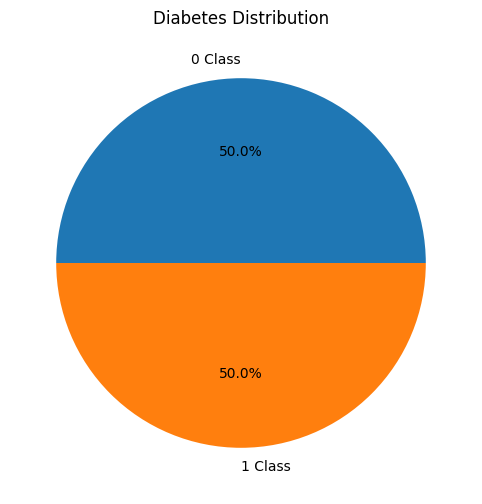

In [17]:
plt.figure(figsize=(8,6))
plt.pie(y_train_resampled.value_counts() , labels=['0 Class' , '1 Class'] , autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

* Now the trained data is balanced



# Set experiment

In [21]:
mlflow.set_experiment("Diabetes_Model_Experiment")

2025/05/05 13:47:12 INFO mlflow.tracking.fluent: Experiment with name 'Diabetes_Model_Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/ZizoElkhateeb/Documents/GitHub/Healthcare-DEPI-Project/Diabetes_Model/mlruns/160607827430774147', creation_time=1746442032756, experiment_id='160607827430774147', last_update_time=1746442032756, lifecycle_stage='active', name='Diabetes_Model_Experiment', tags={}>

# Logistic

In [22]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__solver': ['liblinear', 'lbfgs'] # Changed 'classifier__solver' to 'logisticregression__solver'
}

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score ,recall_score , classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



log_pip = make_pipeline(StandardScaler(), LogisticRegression())

with mlflow.start_run(run_name="lr_model"):
    
    log_grid_search = GridSearchCV(log_pip, param_grid, cv=5)
    log_grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_log_params = log_grid_search.best_params_
    for key, value in best_log_params.items():
        mlflow.log_param(key, value)
    
    y_pred_log = log_grid_search.predict(X_test_resampled)
    
    mlflow.sklearn.log_model(log_grid_search, "model")
    
    accuracy_log = accuracy_score(y_test_resampled, y_pred_log)
    mlflow.log_metric("accuracy", accuracy_log)
    
    report = classification_report(y_test_resampled, y_pred_log, output_dict=True)
    
    # Log precision, recall, and f1-score for both classes
    mlflow.log_metric("precision_0", report["0.0"]["precision"])
    mlflow.log_metric("recall_0", report["0.0"]["recall"])
    mlflow.log_metric("f1_score_0", report["0.0"]["f1-score"])
    
    mlflow.log_metric("precision_1", report["1.0"]["precision"])
    mlflow.log_metric("recall_1", report["1.0"]["recall"])
    mlflow.log_metric("f1_score_1", report["1.0"]["f1-score"])
    mlflow.log_metric("f1_score_weighted", report["weighted avg"]["f1-score"])
    mlflow.log_metric("f1_score_macro", report["macro avg"]["f1-score"])
    
    # Log the classification report as an artifact
    import json
    with open("classification_report.json", "w") as f:
        json.dump(report, f, indent=4)

    mlflow.log_artifact("classification_report.json")
    

2025/05/05 17:10:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [35]:
log_grid_search.best_params_

{'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}

In [36]:
y_pred = log_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))


0.7339584056796697


In [37]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     38876
         1.0       0.72      0.76      0.74     38875

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



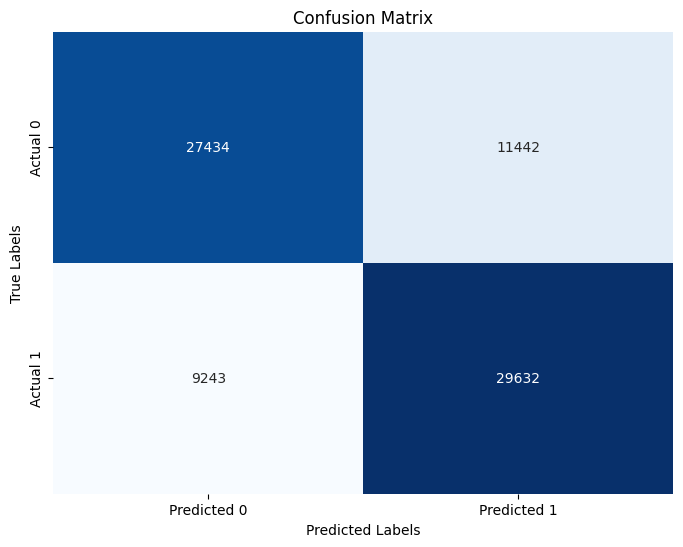

In [38]:
cm1 = confusion_matrix(y_test_resampled, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Desicion Tree

In [39]:
dt_param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_pip = make_pipeline(StandardScaler(), DecisionTreeClassifier())

with mlflow.start_run(run_name="dt_model"):
    
    # Fit the model
    dt_grid_search = GridSearchCV(dt_pip, dt_param_grid, cv=5)
    dt_grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_log_params = dt_grid_search.best_params_
    for key, value in best_log_params.items():
        mlflow.log_param(key, value)
    
    y_pred_dt = dt_grid_search.predict(X_test_resampled)
    
    mlflow.sklearn.log_model(dt_grid_search, "model")
    
    accuracy = accuracy_score(y_test_resampled, y_pred_dt)
    mlflow.log_metric("accuracy", accuracy)
        
    report = classification_report(y_test_resampled, y_pred_dt, output_dict=True)
    # Log precision, recall, and f1-score for both classes
    mlflow.log_metric("precision_0", report["0.0"]["precision"])
    mlflow.log_metric("recall_0", report["0.0"]["recall"])
    mlflow.log_metric("f1_score_0", report["0.0"]["f1-score"])
    
    mlflow.log_metric("precision_1", report["1.0"]["precision"])
    mlflow.log_metric("recall_1", report["1.0"]["recall"])
    mlflow.log_metric("f1_score_1", report["1.0"]["f1-score"])
    
    # Log the classification report as an artifact
    with open("classification_report.json", "w") as f:
        json.dump(report, f, indent=4)
    
    mlflow.log_artifact("classification_report.json")
        

2025/05/05 17:19:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [41]:
# best parameters
dt_grid_search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 5}

In [44]:
y_pred = dt_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.8578281951357539


In [45]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     38876
         1.0       0.88      0.83      0.85     38875

    accuracy                           0.86     77751
   macro avg       0.86      0.86      0.86     77751
weighted avg       0.86      0.86      0.86     77751



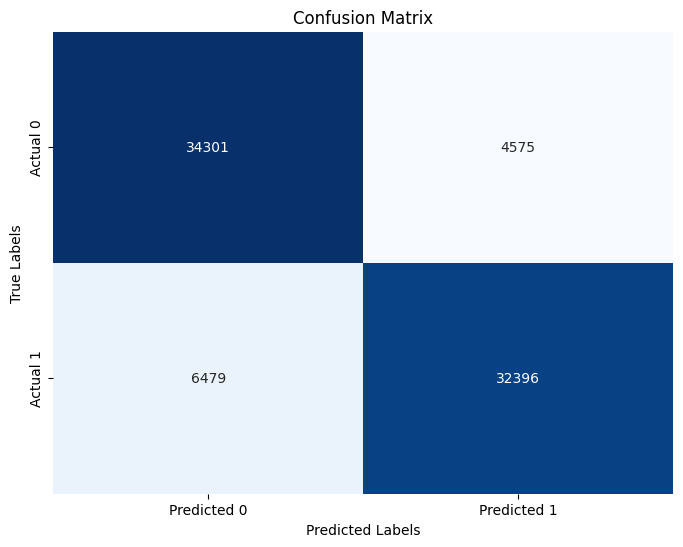

In [46]:
cm2= confusion_matrix(y_test_resampled, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RandomForest

In [47]:
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100],          # Reasonable default
    'randomforestclassifier__max_depth': [10, 20],          # Reasonable control of complexity
    'randomforestclassifier__min_samples_split': [2, 5],    # Minimal branching options
    'randomforestclassifier__min_samples_leaf': [1, 2]      # Leaf options
}

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_pip = make_pipeline(StandardScaler() , RandomForestClassifier())

with mlflow.start_run(run_name="rf_model"):
    
    rf_grid_search = GridSearchCV(rf_pip, rf_param_grid, cv=5)
    rf_grid_search.fit(X_train_resampled, y_train_resampled)

    best_log_params = rf_grid_search.best_params_
    for key, value in best_log_params.items():
        mlflow.log_param(key, value)
    
    y_pred_rf = rf_grid_search.predict(X_test_resampled)
    
    mlflow.sklearn.log_model(rf_grid_search, "model")
    
    accuracy = accuracy_score(y_test_resampled, y_pred_rf)
    mlflow.log_metric("accuracy", accuracy)
    
    report = classification_report(y_test_resampled, y_pred_rf, output_dict=True)
    
    mlflow.log_metric("precision_0", report["0.0"]["precision"])
    mlflow.log_metric("recall_0", report["0.0"]["recall"])
    mlflow.log_metric("f1_score_0", report["0.0"]["f1-score"])
    mlflow.log_metric("precision_1", report["1.0"]["precision"])
    mlflow.log_metric("recall_1", report["1.0"]["recall"])
    mlflow.log_metric("f1_score_1", report["1.0"]["f1-score"])
    
    # Log the classification report as an artifact
    with open("classification_report.json", "w") as f:
        json.dump(report, f, indent=4)
    
    mlflow.log_artifact("classification_report.json")

c:\Users\ZizoElkhateeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
2025/05/05 17:42:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [50]:
rf_grid_search.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100}

In [70]:
y_pred = rf_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.8639245797481705


In [71]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38876
         1.0       0.87      0.85      0.86     38875

    accuracy                           0.86     77751
   macro avg       0.86      0.86      0.86     77751
weighted avg       0.86      0.86      0.86     77751



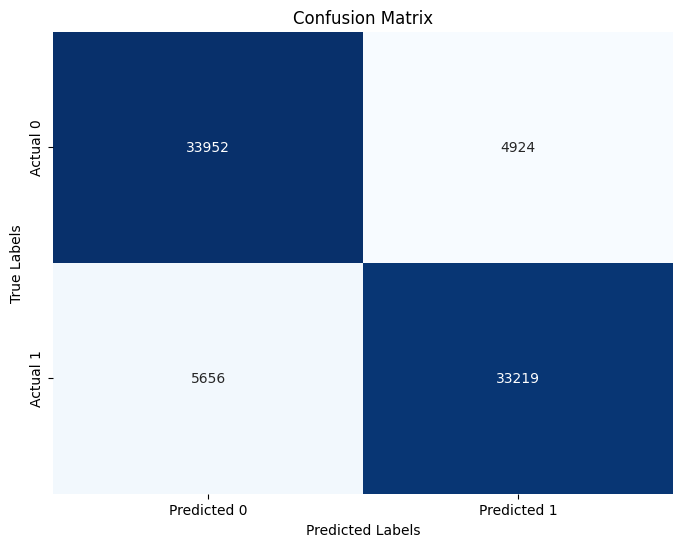

In [72]:
cm3 = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [51]:
xgb_param_grid = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [3, 6, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1],
    'xgbclassifier__subsample': [0.8, 1],
    'xgbclassifier__colsample_bytree': [0.8, 1]
}

In [52]:
from xgboost import XGBClassifier

xgb_pip = make_pipeline(StandardScaler() , XGBClassifier())

with mlflow.start_run(run_name="xgb_model"):
    
    xgb_grid_search = GridSearchCV(xgb_pip, xgb_param_grid, cv=5)
    xgb_grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_log_params = xgb_grid_search.best_params_
    for key, value in best_log_params.items():
        mlflow.log_param(key, value)
    
    y_pred_xgb = xgb_grid_search.predict(X_test_resampled)
    mlflow.sklearn.log_model(xgb_grid_search, "model")
    
    accuracy = accuracy_score(y_test_resampled, y_pred_xgb)
    mlflow.log_metric("accuracy", accuracy)
    
    report = classification_report(y_test_resampled, y_pred_xgb, output_dict=True)
    mlflow.log_metric("precision_0", report["0.0"]["precision"])
    mlflow.log_metric("recall_0", report["0.0"]["recall"])
    mlflow.log_metric("f1_score_0", report["0.0"]["f1-score"])
    
    mlflow.log_metric("precision_1", report["1.0"]["precision"])
    mlflow.log_metric("recall_1", report["1.0"]["recall"])
    mlflow.log_metric("f1_score_1", report["1.0"]["f1-score"])
    
    # Log the classification report as an artifact
    with open("classification_report.json", "w") as f:
        json.dump(report, f, indent=4)
    
    mlflow.log_artifact("classification_report.json")

2025/05/05 18:07:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [53]:
xgb_grid_search.best_params_

{'xgbclassifier__colsample_bytree': 1,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__subsample': 0.8}

In [54]:
y_pred = xgb_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.8684904374220267


In [55]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.87     38876
         1.0       0.91      0.82      0.86     38875

    accuracy                           0.87     77751
   macro avg       0.87      0.87      0.87     77751
weighted avg       0.87      0.87      0.87     77751



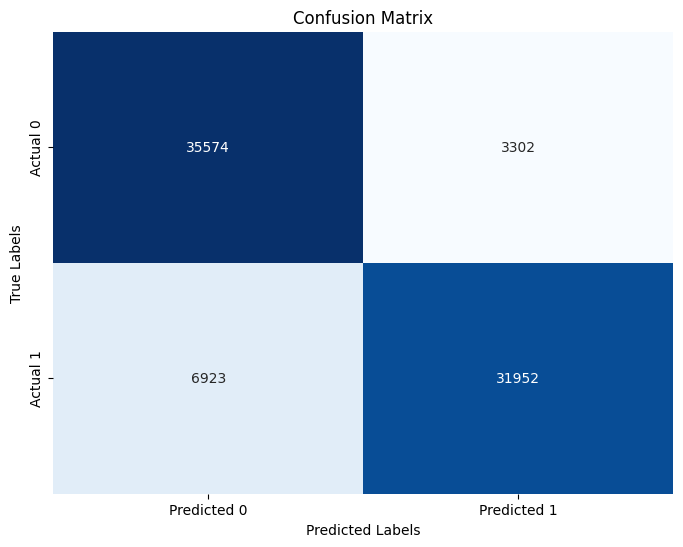

In [56]:
cm4= confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Best Model Accuracy and Metrics : XGBoost

In [ ]:
import pickle

# Save the trained XGBoost model (or pipeline + gridsearch)
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_grid_search, file)

In [ ]:
'''from google.colab import files
files.download('xgboost_model.pkl')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>